##**Introdution**:

In my academic journey at PUC Rio, a pivotal phase of pursuing my postgraduate studies, I am deeply immersed in the sophisticated realms of machine learning and deep learning. This educational odyssey is not just a comprehensive application of the knowledge acquired but also marks the stage where we showcase our skills and creativity through the development of a Minimum Viable Product (MVP).

For my machine learning project, I have meticulously chosen linear regression as the central theme for exploration, focusing on analyzing the rich dataset of Boston Housing prices. This dataset encompasses a variety of features of houses in the Boston area, such as the number of rooms, crime rate, and property tax rates, all crucial elements that shape the dynamics of housing prices.

Through this endeavor, I plan to precisely predict housing prices using a linear regression model and delve into how various features impact real estate values. This will not only deepen my understanding of machine learning theories but also provide a valuable experience of applying these theories to real-world data. This process is a significant enhancement of my data science skills and an important exploration of my depth of insight into real estate market analysis.

##**MVP Overview**

This Minimum Viable Product (MVP) will showcase my comprehensive skills in the field of machine learning, particularly in data processing, analysis, and model application. Specifically, my MVP will encompass the following key components:

Data ETL (Extract, Transform, Load): I will extract data from the Boston Housing dataset and perform necessary transformations and cleaning to ensure data quality and usability. This step is crucial for subsequent analysis as clean, structured data is the foundation for building effective models.

Data Analysis: Next, I will conduct an in-depth analysis of the data to identify key features that may impact housing prices. This involves exploring various variables in the dataset and conducting statistical analyses to understand how these features interact and influence prices.

Model Selection: Based on the understanding of the data, I will choose the most suitable machine learning model for this dataset and prediction objective. While linear regression will be a primary consideration, I will also evaluate other potential models to ensure the final choice can predict housing prices most effectively.

Model Tuning: Finally, I will fine-tune the selected model, including parameter optimization and cross-validation, to enhance prediction accuracy. The goal at this stage is to ensure the model performs well not only on the training data but also adapts effectively to new, unseen data.

Additionally, the MVP incorporates:

Advanced Data Processing and Model Optimization: Implementing sophisticated techniques such as data segmentation, adjusting sample weights, and introducing polynomial features to enhance model predictions, especially for high-value properties. These methods aimed to improve model accuracy in specific price ranges but also highlighted the complexity and challenges in predicting housing prices in dynamic markets.

Through this MVP, I aim to demonstrate my data science skills and effectively predict and analyze the Boston Housing dataset.

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
FOLDERNAME = "PUC_Rio/ML/Boston_Housing"
%cd drive/MyDrive/$FOLDERNAME

/content/drive/MyDrive/PUC_Rio/ML/Boston_Housing


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install matplotlib-venn

In [ ]:
# nstalling pandas profiling (run only the first time, then comment out this line)
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [4]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import mutual_info_regression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from pandas_profiling import ProfileReport

##**ETL - Data Pre-Processing**
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston)


###**Extraction**

In [5]:
# Data Extraction
url = 'http://lib.stat.cmu.edu/datasets/boston'

response = requests.get(url)
data = response.text

print(data[:2000])

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        100

###**Data Transformation**

In [6]:
# The data extracted is a big string
data_lines = data.split('\n')[22:]
print(data_lines)

[' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30', '  396.90   4.98  24.00', ' 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80', '  396.90   9.14  21.60', ' 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80', '  392.83   4.03  34.70', ' 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70', '  394.63   2.94  33.40', ' 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70', '  396.90   5.33  36.20', ' 0.02985   0.00   2.180  0  0.4580  6.4300  58.70  6.0622   3  222.0  18.70', '  394.12   5.21  28.70', ' 0.08829  12.50   7.870  0  0.5240  6.0120  66.60  5.5605   5  311.0  15.20', '  395.60  12.43  22.90', ' 0.14455  12.50   7.870  0  0.5240  6.1720  96.10  5.9505   5  311.0  15.20', '  396.90  19.15  27.10', ' 0.21124  12.50   7.870  0  0.5240  5.6310 100.00  6.0821   5  311.0  15.20', '  386.63  29.93  16.50', ' 0.17004  12.50   7.870  0  0.5240  6.0040  85.90  6.

Combine current line and previous line into one string

Convert each element in the split list of elements to a floating point number

In [9]:
data_list = []
for i in range(len(data_lines)):
  if i%2 == 1:
    row_string = data_lines[i-1] + data_lines[i]
    new_row = row_string.split()
    new_row = list(map(float, new_row))
    data_list.append(new_row)
print(data_list)

[[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98, 24.0], [0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14, 21.6], [0.02729, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03, 34.7], [0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94, 33.4], [0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.9, 5.33, 36.2], [0.02985, 0.0, 2.18, 0.0, 0.458, 6.43, 58.7, 6.0622, 3.0, 222.0, 18.7, 394.12, 5.21, 28.7], [0.08829, 12.5, 7.87, 0.0, 0.524, 6.012, 66.6, 5.5605, 5.0, 311.0, 15.2, 395.6, 12.43, 22.9], [0.14455, 12.5, 7.87, 0.0, 0.524, 6.172, 96.1, 5.9505, 5.0, 311.0, 15.2, 396.9, 19.15, 27.1], [0.21124, 12.5, 7.87, 0.0, 0.524, 5.631, 100.0, 6.0821, 5.0, 311.0, 15.2, 386.63, 29.93, 16.5], [0.17004, 12.5, 7.87, 0.0, 0.524, 6.004, 85.9, 6.5921, 5.0, 311.0, 15.2, 386.71, 17.1, 18.9], [0.22489, 12.5, 7.87, 0.0, 0.524, 6.377, 94.3, 6.3467, 5.0, 311.0, 1

In [10]:
# Features columns
col_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "BLACK", "LSTAT", "MEDV-Price"]

# Boston Housing dataset
df = pd.DataFrame(data_list, columns=col_names)

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
# Dataset: 506 rows, 14 featues
df.shape

(506, 14)

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV-Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV-Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


Handling missing data values

In [13]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Number of missing values:\n", missing_values)

# If there are missing values, fill them with the mean of each feature
if missing_values.sum() > 0:
    df.fillna(df.mean(), inplace=True)
    print("Missing values have been filled with the mean.")
else:
    print("No missing values in the dataset.")

# Check again to ensure all missing values have been filled
print("\nNumber of missing values after filling:\n", df.isnull().sum())

Number of missing values:
 CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
BLACK         0
LSTAT         0
MEDV-Price    0
dtype: int64
No missing values in the dataset.

Number of missing values after filling:
 CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
BLACK         0
LSTAT         0
MEDV-Price    0
dtype: int64


In [19]:
df.count()

CRIM          506
ZN            506
INDUS         506
CHAS          506
NOX           506
RM            506
AGE           506
DIS           506
RAD           506
TAX           506
PTRATIO       506
BLACK         506
LSTAT         506
MEDV-Price    506
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    float64
 4   NOX         506 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    float64
 9   TAX         506 non-null    float64
 10  PTRATIO     506 non-null    float64
 11  BLACK       506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV-Price  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


###**Data Loading**

In [18]:
df.to_csv('Boston_Housing_original.csv', index=False)

##**Data Analyse**

**Descriptive Statistical Analysis:**

1. Crime Rate (CRIM): The distribution of crime rate shows a right-skewed distribution, with most observations clustered at lower values but some extreme high values are also present.
2. Proportion of Residential Land Zoned (ZN): This feature exhibits a significant right-skewed distribution, indicating limited residential land use in most areas.
3. Proportion of Non-Retail Business Acres (INDUS): This variable displays a bimodal distribution, reflecting two distinct urban planning patterns.
4. Charles River Dummy Variable (CHAS): As a discrete variable, the vast majority of observations are 0, indicating locations not adjacent to the Charles River.
5. Nitric Oxides Concentration (NOX): This feature shows a centrally concentrated distribution with a slight right skew.
6. Average Number of Rooms (RM): This feature is near a normal distribution but slightly right-skewed, indicating a concentration of houses with a moderate number of rooms.
7. Age of Houses (AGE): This feature shows a left-skewed distribution, with most houses built before 1940.
8. Weighted Distances to Boston Employment Centers (DIS): Exhibits a significant right skew, indicating that most areas are far from employment centers.
9. Index of Accessibility to Highways (RAD): This variable shows distinct peaks and concentration, reflecting the accessibility of certain areas to highways.
10. Property Tax Rate (TAX): This feature shows a multimodal distribution, reflecting varying tax policies across different areas.
11. Pupil-Teacher Ratio (PTRATIO): Exhibits a more concentrated distribution, with a higher pupil-teacher ratio in most areas.
12. Proportion of Blacks (BLACK): This feature shows a left-skewed distribution, with a higher proportion of black residents in most areas.
13. Percentage of Lower Status Population (LSTAT): Shows a clear right-skewed distribution, indicating economic disparities within communities.
14. Median Value of Owner-Occupied Homes (MEDV-Price): Housing prices show an approximately normal distribution with a slight right skew, indicating higher prices in certain areas.

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'BLACK'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV-Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

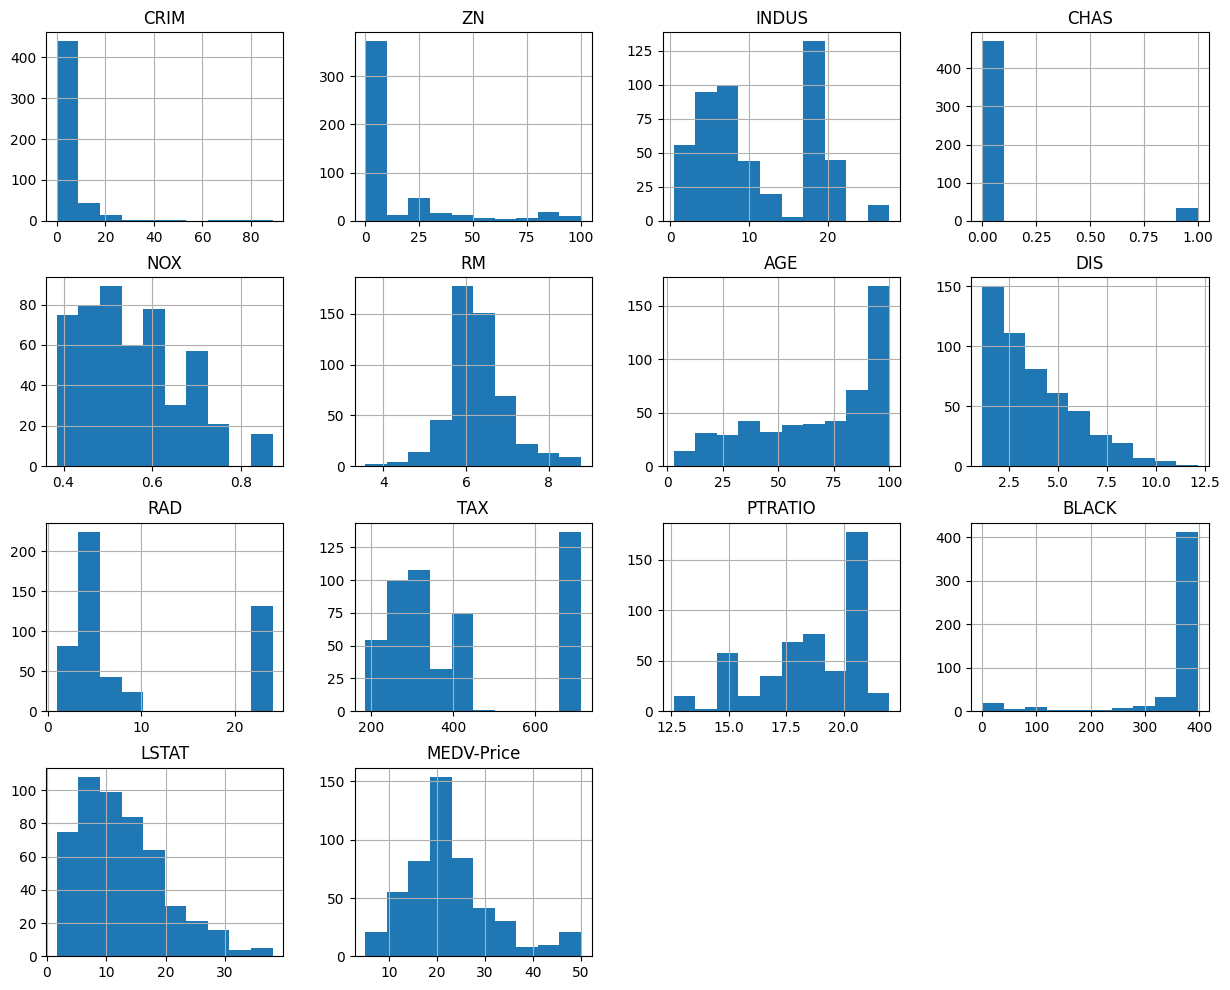

In [22]:
# Descriptive Statistical Analysis
df.hist(figsize=(15,12))

**Heatmap - Correlation Analysis:**

1. Correlation between Number of Rooms (RM) and Housing Price (MEDV-Price): There is a significant positive correlation (about 0.7), indicating that more rooms generally lead to higher housing prices.
2. Correlation between Proportion of Lower Status Population (LSTAT) and Housing Price (MEDV-Price): A strong negative correlation (approximately -0.74) is observed, suggesting that areas with a higher proportion of lower-income populations tend to have lower housing prices.
3. Correlation between Proportion of Industrial Land (INDUS) and Nitric Oxides Concentration (NOX): These two features show a strong positive correlation (about 0.76), indicating that areas with higher proportions of industrial land typically have higher concentrations of nitric oxides.
4. Correlation between Property Tax Rate (TAX) and Index of Accessibility to Highways (RAD): There is also a significant positive correlation (around 0.91) between these two, which may suggest that areas with better highway accessibility tend to have higher property tax rates.
5. Correlation between Age of Houses (AGE) and Nitric Oxides Concentration (NOX): These features have a moderate positive correlation (approximately 0.73), implying that older houses are often found in areas with higher nitric oxide concentrations.

**From the heatmap, it can be observed that 'CHAS' has the lowest degree of correlation with all other features.**

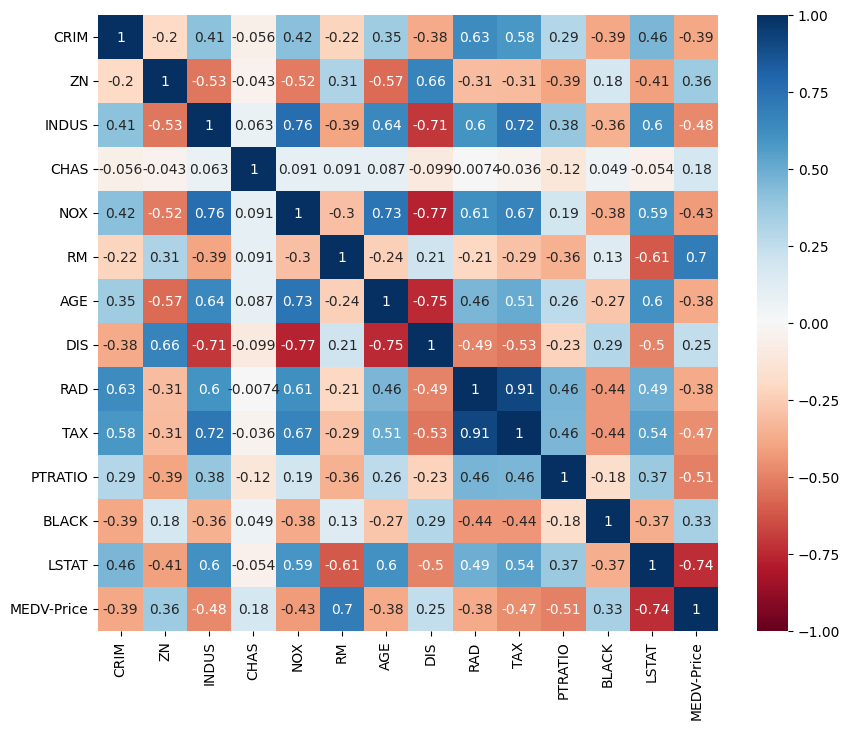

In [23]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

**Pearson Correlation Coefficient Analysis:**

* When the correlation coefficient is close to +1, it indicates a strong positive linear relationship between two variables.
* When the correlation coefficient is close to -1, it indicates a strong negative linear relationship between two variables.
* When the correlation coefficient is close to 0, it indicates that there is no significant linear relationship between the two variables.


In [24]:
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV-Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Descriptive Statistical Analysis:

* count: The number of non-null (non-NaN) values for each variable.
* mean: The average value of each variable.
* std (standard deviation): The standard deviation of each variable, measuring the spread of the data distribution.
* min (minimum): The minimum value of each variable.
* 25% (first quartile): The first quartile of each variable, meaning 25% of the data points are less than or equal to this value.
* 50% (median): The median of each variable, meaning 50% of the data points are less than or equal to this value.
* 75% (third quartile): The third quartile of each variable, meaning 75% of the data points are less than or equal to this value.
* max (maximum): The maximum value of each variable.

In [25]:
# Show statistic summary
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV-Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The purpose of this code is to normalize all features in the Boston Housing dataset except for 'CHAS' and 'NOX'. Normalization is a process of scaling data to a specific range (usually between 0 and 1), which helps in dealing with features of varying scales during data analysis and machine learning.

In [26]:
chas_nox = df[['CHAS', 'NOX']]

df_normalized = df.copy()

# Take all except CHAS, NOX
cols_to_normalize = df_normalized.columns.difference(['CHAS', 'NOX'])
df_normalized[cols_to_normalize] = df_normalized[cols_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

df_normalized[['CHAS', 'NOX']] = chas_nox

In [27]:
df_normalized.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV-Price
0,0.000000,0.18,0.067815,0.0,0.538,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.469,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.469,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.458,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.458,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [28]:
df_normalized.shape

(506, 14)

In [32]:
cols = df_normalized.columns[:13]
print(cols)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'BLACK', 'LSTAT'],
      dtype='object')


**Below the charts display the joint distributions of each feature's impact on housing prices (MEDV). From these plots, we can observe the following trends:**

1. Crime Rate (CRIM): There appears to be a downward trend in housing prices as the crime rate increases, suggesting that areas with higher crime rates may have lower housing prices.
2. Proportion of Residential Land Zoned (ZN): A higher proportion of residential land seems to be associated with higher housing prices.
3. Proportion of Non-Retail Business Acres (INDUS): As the proportion of non-retail business land increases, there is a tendency for housing prices to decline.
4. Charles River Variable (CHAS): Properties near the Charles River seem to command higher prices, though the data points are sparse, which may indicate such areas are less common.
5. Nitric Oxides Concentration (NOX) and Average Number of Rooms (RM): These two features show a relatively clear influence on housing prices. Higher NOX levels are associated with lower housing prices, while a greater number of rooms correlate with higher prices.
6. Age of Houses (AGE) and Weighted Distances to Employment Centers (DIS): Older houses tend to have lower prices, while properties closer to employment centers seem to have higher prices.
7. Accessibility to Highways (RAD) and Property Tax Rate (TAX): There is no clear consistent trend with housing prices in areas with better accessibility to highways and higher property tax rates.
8. Pupil-Teacher Ratio (PTRATIO) and Proportion of Blacks (BLACK): The distributions for these features are more complex, but areas with a higher pupil-teacher ratio appear to have lower housing prices.
9. Percentage of Lower Status Population (LSTAT): This feature shows a significant negative correlation with housing prices, with areas having a higher percentage of lower-income populations experiencing lower housing prices.

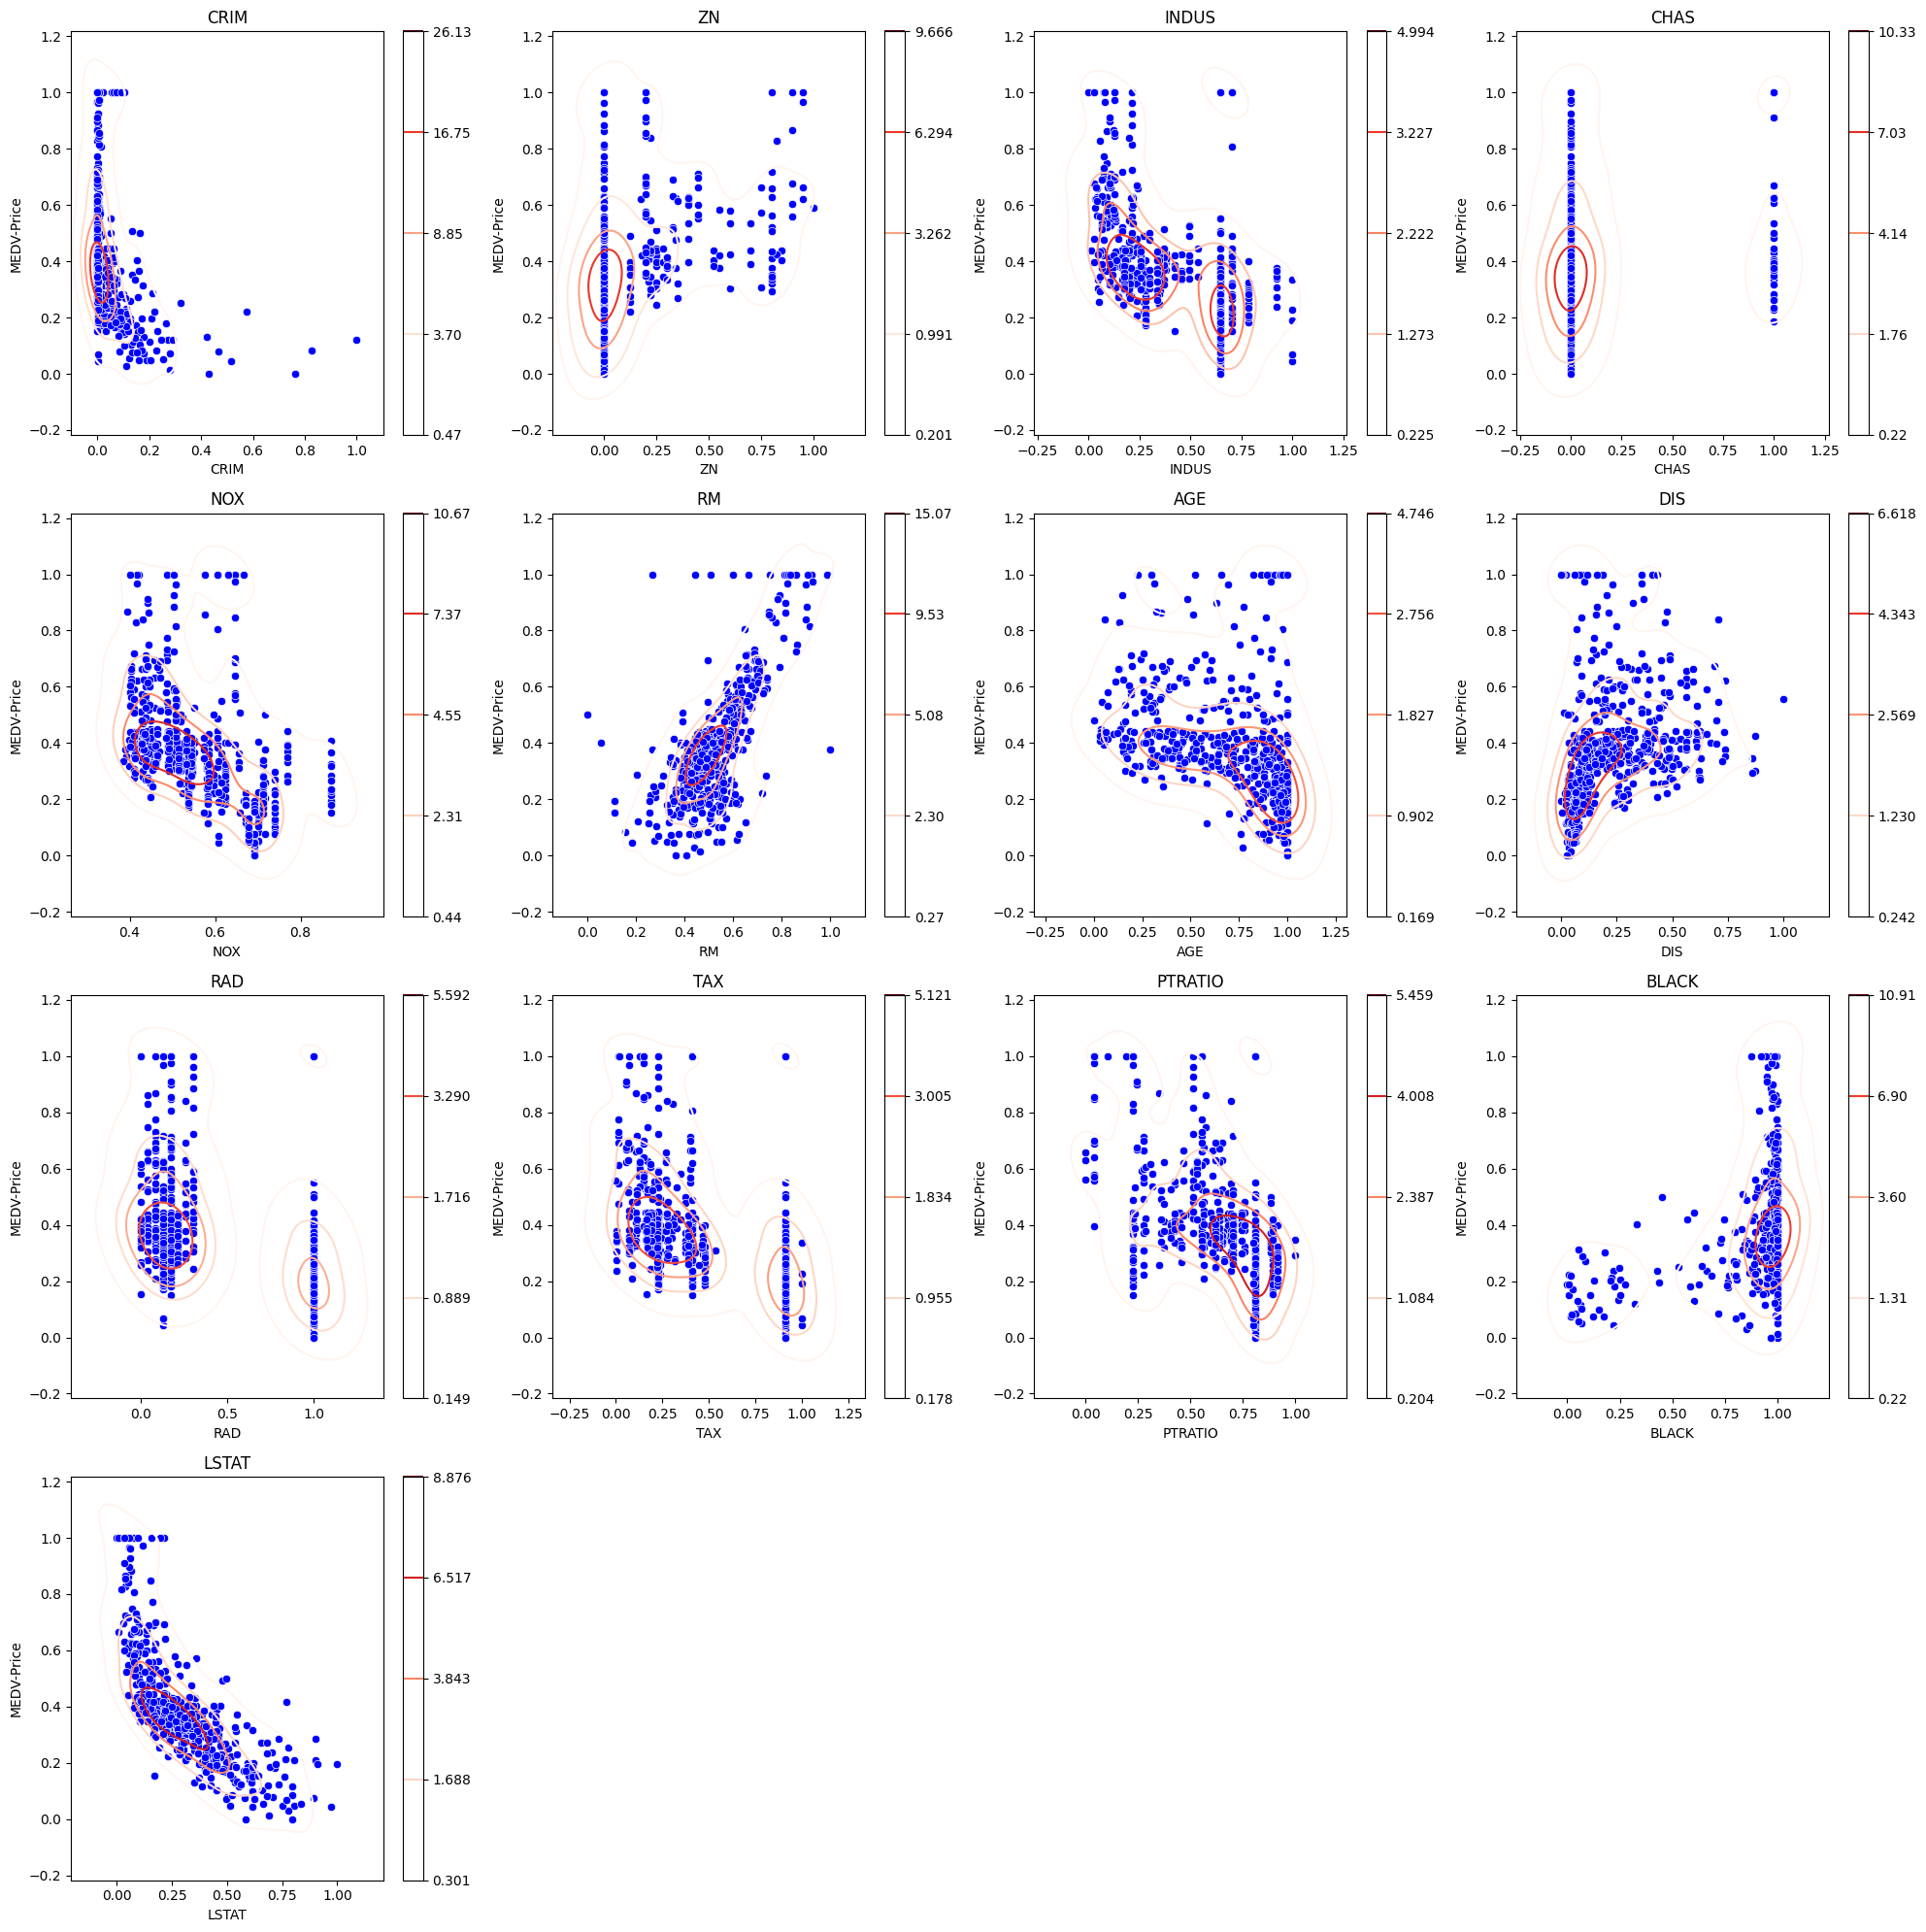

In [33]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for i, col in enumerate(cols):
    ax = axes[i//4, i%4]

    sns.scatterplot(data=df_normalized, x=col, y='MEDV-Price', ax=ax, color='b')
    sns.kdeplot(x=df_normalized[col], y=df_normalized['MEDV-Price'], ax=ax, color='r', levels=5, cmap="Reds", cbar=True)

    ax.set_title(col)

for j in range(i+1, 16):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [ ]:
profile = ProfileReport(df, title='Pandas Profiling Boston Housing dataset Report', html={'style':{'full_width':False}})
profile.to_notebook_iframe()

##**Features Selection**

In [14]:
X = df.iloc[:, :-1]
Y = df.iloc[ :,-1]

In [35]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV-Price, dtype: float64

Feature Importances using F-Regression for Boston Housing Dataset

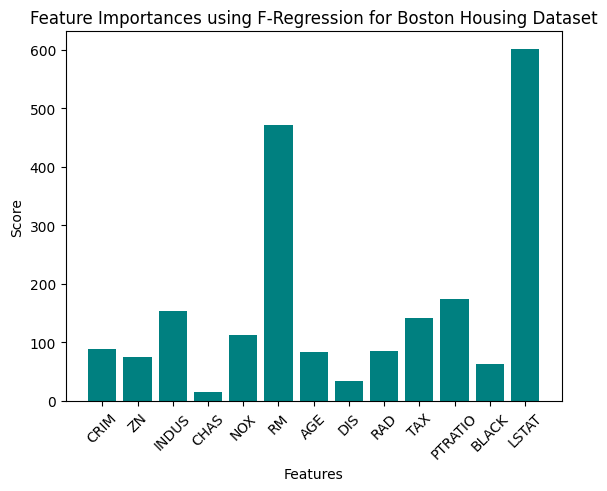

In [37]:
best_var = SelectKBest(score_func=f_regression)
fit = best_var.fit(X, Y)

scores = fit.scores_

plt.bar(df.columns[:-1], scores, color='teal')
plt.title('Feature Importances using F-Regression for Boston Housing Dataset')
plt.xlabel('Features')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

Recursive Feature Elimination (RFE) is a feature selection method that recursively removes the least important features based on the model's coefficients or feature importances.

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

rfe = RFE(modelo, n_features_to_select=8)
fit = rfe.fit(X, Y)

print("Atributos Originais:", df.columns[:-1])

# Displays the selected attributes (marked as True in "Selected Attributes"
# and with a value of 1 in "Attribute Ranking")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=df.columns[0:-1]))

Atributos Originais: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'BLACK', 'LSTAT'],
      dtype='object')

Atributos Selecionados: [ True False False  True  True  True False  True  True False  True False
  True]

Ranking de atributos: [1 3 2 1 1 1 6 1 1 4 1 5 1]

Qtd de melhores Atributos: 8

Nomes dos Atributos Selecionados: ['CRIM' 'CHAS' 'NOX' 'RM' 'DIS' 'RAD' 'PTRATIO' 'LSTAT']


The provided code snippet implements a feature importance method using the "Extra Trees Regressor," which is an ensemble learning technique based on randomized decision trees

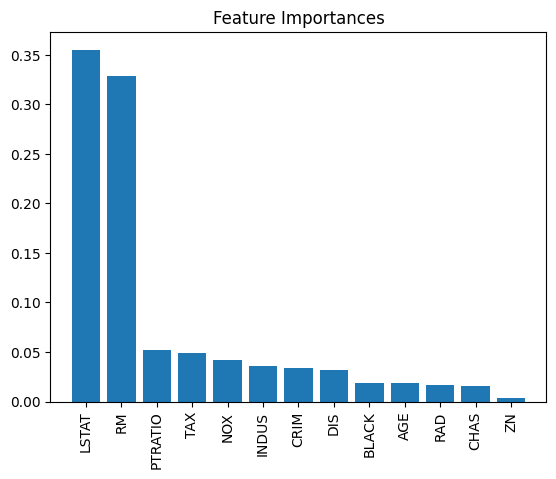

In [15]:
from sklearn.ensemble import ExtraTreesRegressor

modelo = ExtraTreesRegressor()
modelo.fit(X, Y)

# Get feature importance
importances = modelo.feature_importances_

# Sort feature importance
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), df.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Mutual Information Regression is a method for measuring the amount of shared information between two variables. It is particularly useful in feature selection because it does not assume a linear relationship between variables and can capture any type of statistical dependency.

(354, 13) (354,) (152, 13) (152,)


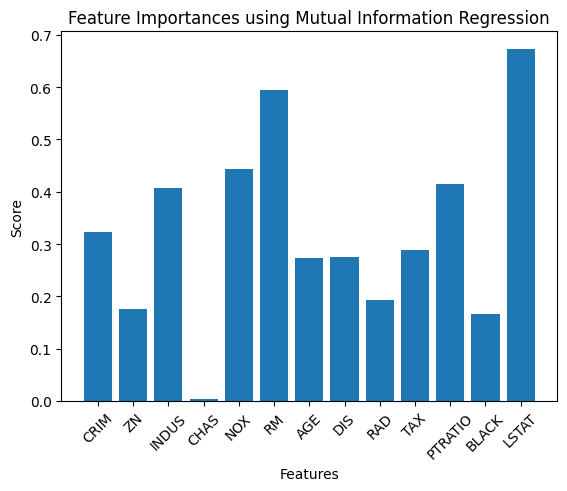

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

test_size = 0.2
seed = 7

x_t, x_val, y_t, y_val = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=seed)
print(x_t.shape, y_t.shape, x_val.shape, y_val.shape)

fs = SelectKBest(score_func=mutual_info_regression, k='all')

# learn relationship from training data
fs.fit(x_t, y_t)

# transform train input data
x_train_fs = fs.transform(x_t)

# transform test input data
x_val_fs = fs.transform(x_val)

plt.bar(df.columns[:-1], fs.scores_)
plt.title('Feature Importances using Mutual Information Regression')
plt.xlabel('Features')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()



##**Machine Learning Model Selection and Ensemble Learning Methods Comparison**

Now ready to proceed with model selection, and I plan to use two different datasets for this:

1. Using all features except for 'CHAS':
Based on the Data Analysis (Heatmap Analysis, Pearson Correlation Coefficient Analysis), it is evident that the relationship between 'CHAS' and 'medv-price' is very minimal, so I have decided to remove this feature. This model is suitable for corporate institutions, as they can easily access data for these features.
2.After the model training is complete, to simulate real-world predictions for the general public using the trained model, the general public may not have a clear understanding of some features, such as 'ZN', 'INDUS', 'NOX'. Therefore, I have chosen to train with features that are important in the heatmap and feature selection, yet are easier to understand: "INDUS", "RM", "TAX", "PTRATIO", "LSTAT".

###**Creation of multiple models**

In [45]:

k = 10
kfold = KFold(n_splits=k, shuffle=True, random_state=7)

# Global seed
np.random.seed(7)

models = []

models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('D-Tree', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
models.append(('XGB', XGBRegressor()))

# Defining parameters of base classifier for the BaggingRegressor
base = DecisionTreeRegressor()
num_trees = 100
max_features = 4

# Creating models for VotingRegressor
bases = []
model1 = LinearRegression()
bases.append(('linear', model1))
model2 = DecisionTreeRegressor()
bases.append(('d-tree', model2))
model3 = SVR()
bases.append(('svm', model3))

# Creating emsembles and add into models list
models.append(('Bagging', BaggingRegressor(base_estimator=base, n_estimators=num_trees)))
models.append(('R-Forest', RandomForestRegressor(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostRegressor(n_estimators=num_trees)))
models.append(('GBR', GradientBoostingRegressor(n_estimators=num_trees)))
models.append(('Voting', VotingRegressor(bases)))


###**Divide dataset into train dataset and test dataset**

In [43]:
features_12 = ["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "BLACK", "LSTAT"]
features_5 = ["INDUS", "RM", "TAX", "PTRATIO", "LSTAT"]

In [42]:
test_size = 0.3
df_x = df.drop('MEDV-Price', axis=1)
df_y = df['MEDV-Price']
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=test_size, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


In [44]:
train_12 = X_train[features_12]
test_12 = X_test[features_12]

train_5 = X_train[features_5]
test_5 = X_test[features_5]

In [46]:
datas = [(train_12, Y_train), (train_5, Y_train)]

print(datas[0][0].shape)
print(datas[0][1].shape)
print(datas[1][0].shape)
print(datas[1][1].shape)

(354, 12)
(354,)
(354, 5)
(354,)


###**Model Evaluation**

In [ ]:
# To collect the result of train_data
train12_results = []
train12_names = []
train5_results = []
train5_names = []

**Performance Comparison of Machine Learning Models on Different Feature Sets**

The MSE/RMSE while datas with 12 features:

LR: MSE 26.08 (13.52) - RMSE 5.11
Ridge: MSE 26.15 (14.05) - RMSE 5.11
Lasso: MSE 65.89 (28.04) - RMSE 8.12
KNN: MSE 20.52 (11.53) - RMSE 4.53
D-Tree: MSE 28.79 (28.47) - RMSE 5.37
SVM: MSE 36.25 (22.28) - RMSE 6.02
XGB: MSE 14.28 (8.75) - RMSE 3.78
Bagging: MSE 15.65 (10.12) - RMSE 3.96
R-Forest: MSE 12.88 (9.59) - RMSE 3.59
Ada: MSE 17.06 (10.19) - RMSE 4.13
GBR: MSE 12.72 (8.65) - RMSE 3.57
Voting: MSE 20.83 (13.02) - RMSE 4.56


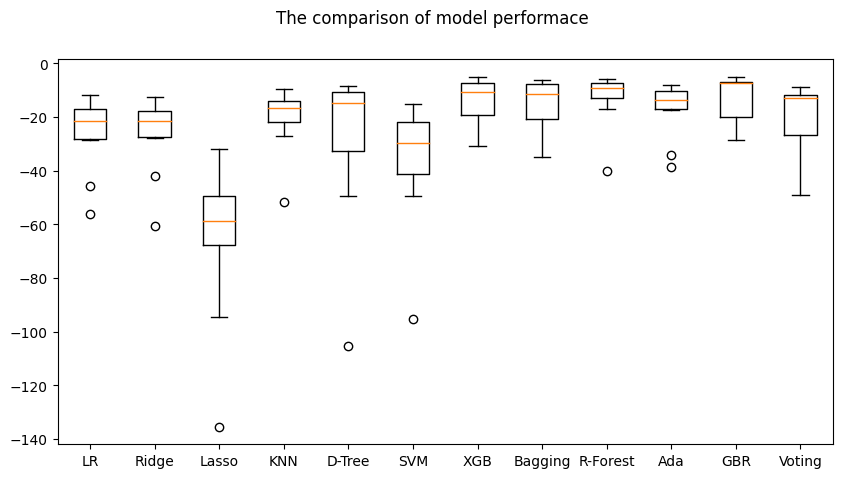

----------------------------------------------------------------------------------------------------
The MSE/RMSE while datas with 5 features:

LR: MSE 29.46 (15.40) - RMSE 5.43
Ridge: MSE 29.45 (15.58) - RMSE 5.43
Lasso: MSE 65.89 (28.04) - RMSE 8.12
KNN: MSE 19.96 (13.33) - RMSE 4.47
D-Tree: MSE 28.82 (19.87) - RMSE 5.37
SVM: MSE 28.10 (16.22) - RMSE 5.30
XGB: MSE 15.18 (10.19) - RMSE 3.90
Bagging: MSE 15.43 (11.31) - RMSE 3.93
R-Forest: MSE 14.92 (11.26) - RMSE 3.86
Ada: MSE 17.34 (11.13) - RMSE 4.16
GBR: MSE 15.43 (10.07) - RMSE 3.93
Voting: MSE 21.19 (13.82) - RMSE 4.60


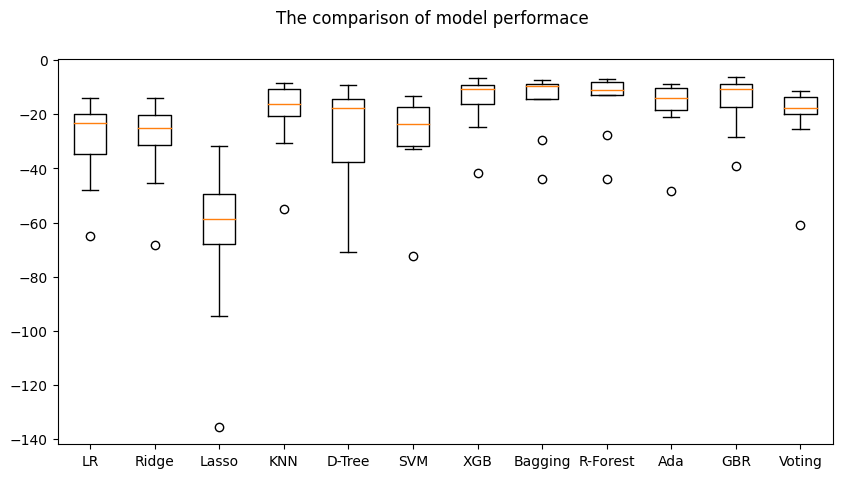

----------------------------------------------------------------------------------------------------


In [47]:

for data in datas:

  # Normalization
  normalizer = MinMaxScaler()
  x_train_nor = normalizer.fit_transform(data[0])
  y_label = data[1]

  # dataset with 12 features
  if data[0].shape[1] == 12:
      print('\033[91mThe MSE/RMSE while datas with 12 features:\033[0m\n')
      results = train12_results
      names = train12_names
  # dataset with 5 features
  else:
      print('\033[91mThe MSE/RMSE while datas with 5 features:\033[0m\n')
      results = train5_results
      names = train5_names

  for name, model in models:
    cv_results = cross_val_score(model, x_train_nor, y_label, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = '%s: MSE %0.2f (%0.2f) - RMSE %0.2f' % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
    print(msg)

  fig = plt.figure(figsize=(10, 5))
  fig.suptitle('The comparison of model performace')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(names)
  plt.show()
  print('-'*100)

##**Training Selected Models**

Based on the code provided and the results of Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), we have selected three models that demonstrated the best performance for further training. These models include Random Forest Regressor, Gradient Boosting Regressor, and XGBoost Regressor. These models have shown relatively lower MSE and RMSE values in datasets with both 12 and 5 features, indicating good predictive performance.

Considering that these models have a minimal impact from outliers, it means that there's no need for pre-processing the data to remove outliers in this case. The models are capable of maintaining stable performance even with data containing outliers. This feature makes the models more practical, especially for handling real-world data, which often includes some degree of outliers.

In [57]:
np.random.seed(7)

pipelines = []
pipelines.append(('R-Forest', Pipeline(steps=[('normalization', MinMaxScaler()), ('r-forest', RandomForestRegressor())])))
pipelines.append(('GBR', Pipeline(steps=[('normalization', MinMaxScaler()), ('gbr', GradientBoostingRegressor(n_estimators=num_trees))])))
pipelines.append(('XGB', Pipeline(steps=[('normalization', MinMaxScaler()), ('xgb', XGBRegressor())])))


**Setting Hyperparameters for Random Forest, Gradient Boosting, and XGBoost Models**

In [58]:
# Setting parameters
params = []

params.append(('R-Forest', {
    'r-forest__n_estimators': [30, 40, 50, 60],
    'r-forest__max_depth': range(3, 5),
    'r-forest__min_samples_leaf': range(2, 3),
    'r-forest__max_leaf_nodes': range(9, 13)}))

params.append(('GBR', {
    'gbr__n_estimators': [100, 200, 300],
    'gbr__max_depth': [3, 4, 5],
    'gbr__learning_rate': [0.01, 0.05, 0.1],
    'gbr__subsample': [0.8, 0.9, 1.0],
    'gbr__max_features': ['sqrt', 'log2', None]}))

params.append(('XGB', {
    'xgb__n_estimators': [4000, 5000, 7000],
    'xgb__max_depth': [2,3,4],
    'xgb__learning_rate': [0.009, 0.01, 0.02]}))


In [59]:
# To get parameters according to model
def params_grid(name):
  for title, param in params:
    if title == name:
      return param

###**Executing Grid Search to Select and Save Optimal Machine Learning Models**

Grid Search Process is used to automatically tune hyperparameters by searching through a specified range of values and selecting the combination that yields the best performance based on a given evaluation metric.

In [63]:
from sklearn.model_selection import GridSearchCV
from joblib import dump

best_model_train12 = []
best_model_train5 = []

def grid_search(pipelines, x_train_nor, Y_train, is_12_features):
    for name, model in pipelines:     # ex: name = R-Forest

        # estimator = Pipeline(steps=[('normalization', MinMaxScaler()), ('r-forest', RandomForestRegressor())])
        grid = GridSearchCV(estimator=model, param_grid=params_grid(name), scoring='neg_mean_squared_error', cv=kfold)
        grid.fit(x_train_nor, Y_train)

        print('%s - better: %f using %s' % (name, grid.best_score_, grid.best_params_))

        if is_12_features:
          # With 12 features
          best_model_train12.append(grid.best_estimator_)
          model_filename = f"best_model_train12_{name}.joblib"
        else:
          # With 5 features
          best_model_train5.append(grid.best_estimator_)
          model_filename = f"best_model_train5_{name}.joblib"

        # Save models
        # dump(object, filename, compress=0) is the compression level
        dump(grid.best_estimator_, model_filename)
        print(f"Model saved as {model_filename}")

###**Predicting and Plotting Performance Comparison of Best Models**

In [64]:

def predict_and_plot(best_model, x_test, y_test, is_12_features):

    plt.figure(figsize=(10, len(best_model)*3))
    # Pandas series->array
    y_test_np = np.array(y_test)

    for i, estimator in enumerate(best_model):
        # Retrieve the model name
        # estimator.named_steps: This is a dictionary containing all the steps in the Pipeline
        # list(estimator.named_steps.values()): This converts all the values ​​in the named_steps dictionary
        # (that is, the individual steps in the Pipeline) into a list.
        # [1] steps 2, ex:('r-forest', RandomForestRegressor())
        # type(...).__name__: ex:<class 'sklearn.ensemble._forest.RandomForestRegressor'>, get: RandomForestRegressor
        model_name = type(list(estimator.named_steps.values())[1]).__name__

        # Making prediction and calculate validation error MSE
        predictions = estimator.predict(x_test)
        validation_error = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(validation_error)
        print(f"{model_name}_RMSE - Validation Error: {rmse}")

        # Get the index sorted by y_test
        sorted_idx = np.argsort(y_test_np)
        sorted_y_test = y_test_np[sorted_idx]
        sorted_predictions = predictions[sorted_idx]

        # y_val
        # plt.subplot(nrows, ncols, index)
        plt.subplot(len(best_model), 1, i+1)
        plt.plot(sorted_y_test, color='b', label='Ture values')

        # predictions(red)
        plt.plot(sorted_predictions, color='r', label='Predictions')


        plt.title(f"{model_name} - True values X Predictions")
        plt.xlabel('Sample Index (Sorted by True Values)')
        plt.ylabel('Price (USD)')
        plt.legend()

    # space between subplots
    plt.tight_layout()

    plt.show()

###**Parameter Tuning and Performance Validation of Selected Models with Different Feature Sets**

Getting selected model better parameters performance while datas with 12 features:

R-Forest - better: -16.190900 using {'r-forest__max_depth': 4, 'r-forest__max_leaf_nodes': 12, 'r-forest__min_samples_leaf': 2, 'r-forest__n_estimators': 40}
Model saved as best_model_train12_R-Forest.joblib
GBR - better: -10.081059 using {'gbr__learning_rate': 0.1, 'gbr__max_depth': 5, 'gbr__max_features': 'log2', 'gbr__n_estimators': 100, 'gbr__subsample': 0.8}
Model saved as best_model_train12_GBR.joblib
XGB - better: -11.757852 using {'xgb__learning_rate': 0.009, 'xgb__max_depth': 2, 'xgb__n_estimators': 7000}
Model saved as best_model_train12_XGB.joblib

Validation Error while dataset with 12 features:

RandomForestRegressor_RMSE - Validation Error: 3.578243587845491
GradientBoostingRegressor_RMSE - Validation Error: 2.9320915646235295
XGBRegressor_RMSE - Validation Error: 2.836203693825224


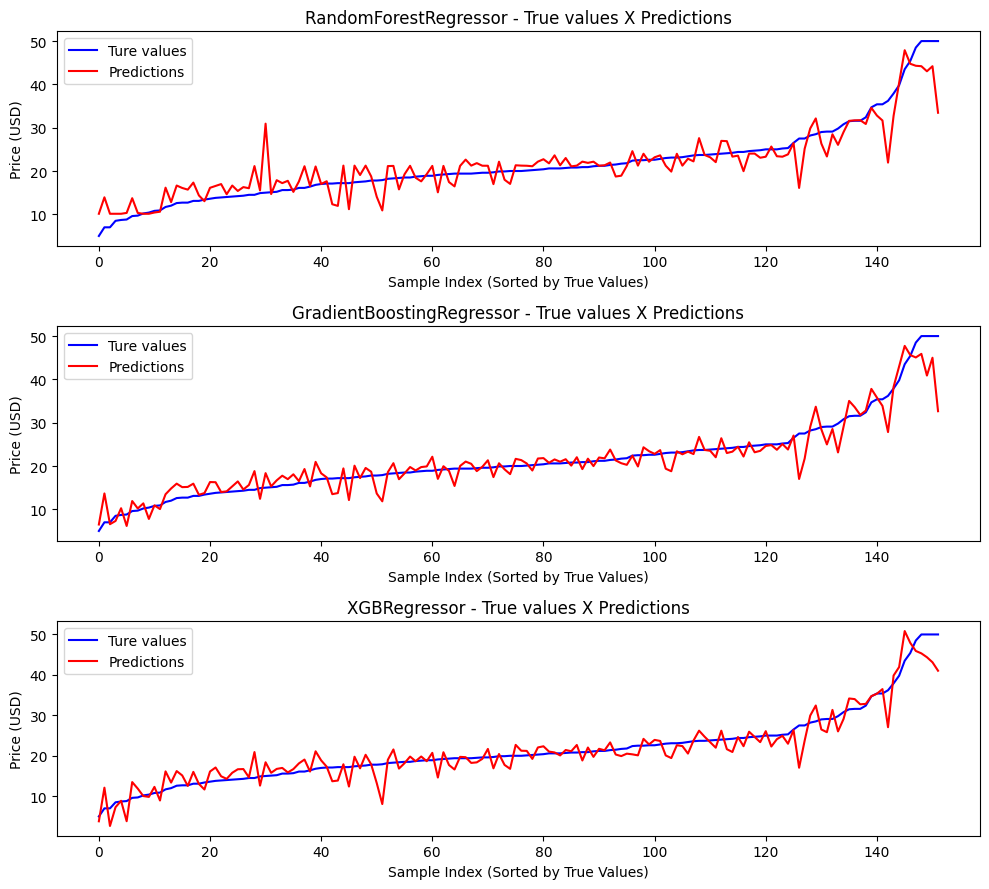

--------------------------------------------------
Getting selected model better parameters performance while datas with features without chas:

R-Forest - better: -17.163161 using {'r-forest__max_depth': 4, 'r-forest__max_leaf_nodes': 12, 'r-forest__min_samples_leaf': 2, 'r-forest__n_estimators': 40}
Model saved as best_model_train5_R-Forest.joblib
GBR - better: -12.023203 using {'gbr__learning_rate': 0.05, 'gbr__max_depth': 5, 'gbr__max_features': 'log2', 'gbr__n_estimators': 200, 'gbr__subsample': 0.8}
Model saved as best_model_train5_GBR.joblib
XGB - better: -13.646435 using {'xgb__learning_rate': 0.009, 'xgb__max_depth': 4, 'xgb__n_estimators': 4000}
Model saved as best_model_train5_XGB.joblib

Validation Error while dataset without chas:

RandomForestRegressor_RMSE - Validation Error: 3.959021774633472
GradientBoostingRegressor_RMSE - Validation Error: 3.760217430537615
XGBRegressor_RMSE - Validation Error: 3.929520300310185


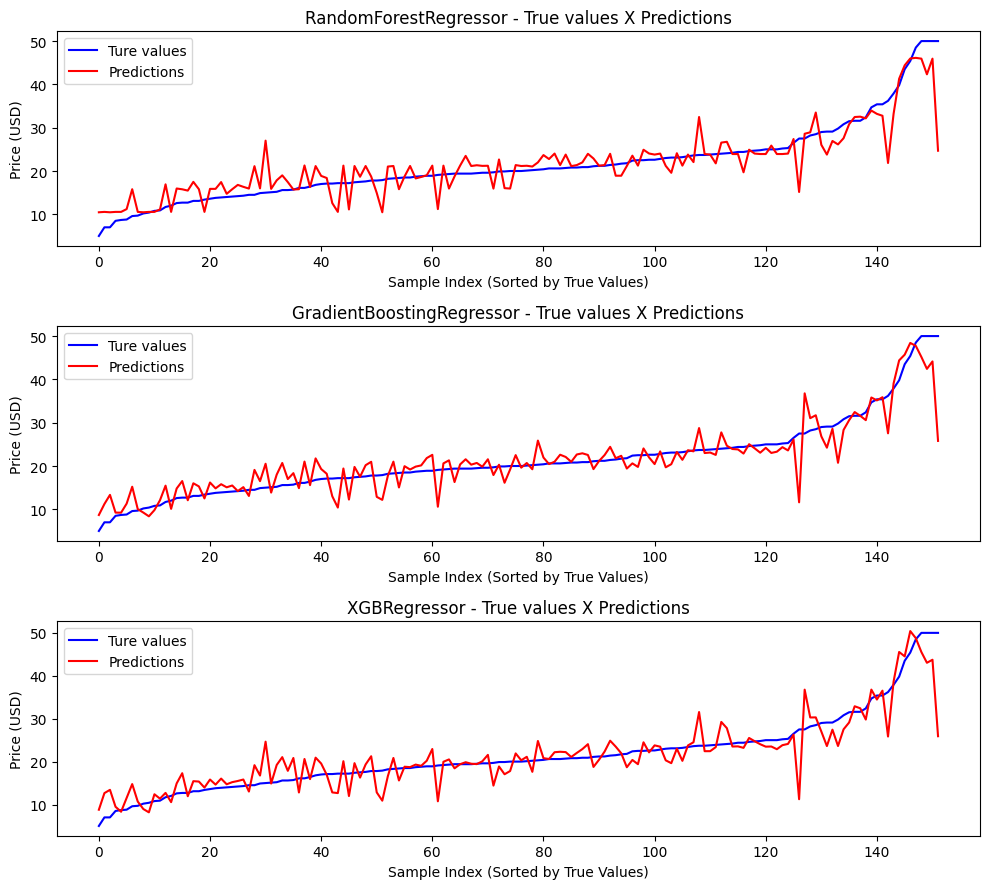

In [65]:

normalizer = MinMaxScaler()
datasets = [(train_12, Y_train, test_12, Y_test), (train_5, Y_train, test_5, Y_test)]

for data in datasets:

    # Normalization
    x_train_nor = normalizer.fit_transform(data[0])
    x_test_nor = normalizer.transform(data[2])

    if data[0].shape[1] == 12:

      is_12_features = True

      # Executing Grid Search to Select and Save Optimal Machine Learning Models
      print('\033[91mGetting selected model better parameters performance while datas with 12 features:\033[0m\n')
      grid_search(pipelines, x_train_nor, Y_train, is_12_features)

      # Predicting and Plotting Performance Comparison of Best Models
      print()
      print('\033[91mValidation Error while dataset with 12 features:\033[0m\n')
      predict_and_plot(best_model_train12, x_test_nor, Y_test, is_12_features)
      print('-'*50)

    else:
      is_12_features = False

      print('\033[91mGetting selected model better parameters performance while datas with features without chas:\033[0m\n')
      grid_search(pipelines, x_train_nor, Y_train, is_12_features)

      print()
      print('\033[91mValidation Error while dataset without chas:\033[0m\n')
      predict_and_plot(best_model_train5, x_test_nor, Y_test, is_12_features)

**Dataset with 12 Features:**

  On the dataset with 12 features, the GradientBoostingRegressor showed the best performance, with a Root Mean Squared Error (RMSE) of 2.93, followed by XGBRegressor (RMSE of 2.84), and then RandomForestRegressor (RMSE of 3.58).
  
  This indicates that GradientBoostingRegressor and XGBRegressor have higher prediction accuracy when dealing with datasets that have a larger number of features.

**Dataset with 5 Features (Excluding CHAS):**

  When CHAS feature is excluded, and only the remaining 5 features are used, GradientBoostingRegressor still performs the best with an RMSE of 3.76, followed by XGBRegressor (RMSE of 3.93), and then RandomForestRegressor (RMSE of 3.96).

  This shows that even with a reduced number of features, GradientBoostingRegressor and XGBRegressor continue to maintain good performance.

##**Advanced Data Processing and Model Optimization Techniques in Boston Housing Price Prediction Project**

Based on the training results of the Boston Housing Price Prediction project, I observed the following trends:

Dataset with 12 Features:

In the dataset containing 12 features, all models performed well in predicting housing prices (medv-price), especially GradientBoostingRegressor and XGBRegressor, with Root Mean Squared Errors (RMSE) of 2.93 and 2.84, respectively. This indicates their effectiveness in predicting most data points. However, there were significant fluctuations in predictions for housing prices exceeding 25.00, suggesting a need for improved accuracy in predicting high-value properties.

Dataset with 5 Features (Excluding CHAS):

When the dataset only contained 5 features (excluding CHAS), there was a slight decline in the predictive performance of the models. For example, the RMSE for GradientBoostingRegressor and XGBRegressor increased to 3.76 and 3.93, respectively. The models still exhibited fluctuations in predicting high-value properties, indicating that the reduction in features impacted their ability to capture the dynamics of high-value properties.

To address the fluctuation in predicting high-value property prices in the Boston Housing Price Prediction project, I implemented the following advanced data processing and model optimization methods to see if there would be significant improvements for high-price properties:

1. **Data Segmentation Method:**

* I divided the data into two different price ranges: lower and higher price ranges, and trained and optimized models separately for each range.

  * Lower Price Range Model: The Bagging model was selected as the best model for this range. We conducted specific parameter tuning and training for the lower price range data.
  * Higher Price Range Model: The XGB model was chosen as the best model for this range, and we conducted parameter tuning and training for it.

* After combining the predictions of both models, we calculated the validation error MSE. However, the results were not as expected.

For detailed information about this training, please refer to the file: Boston_Housing_updated_2sets.ipynb

Result:


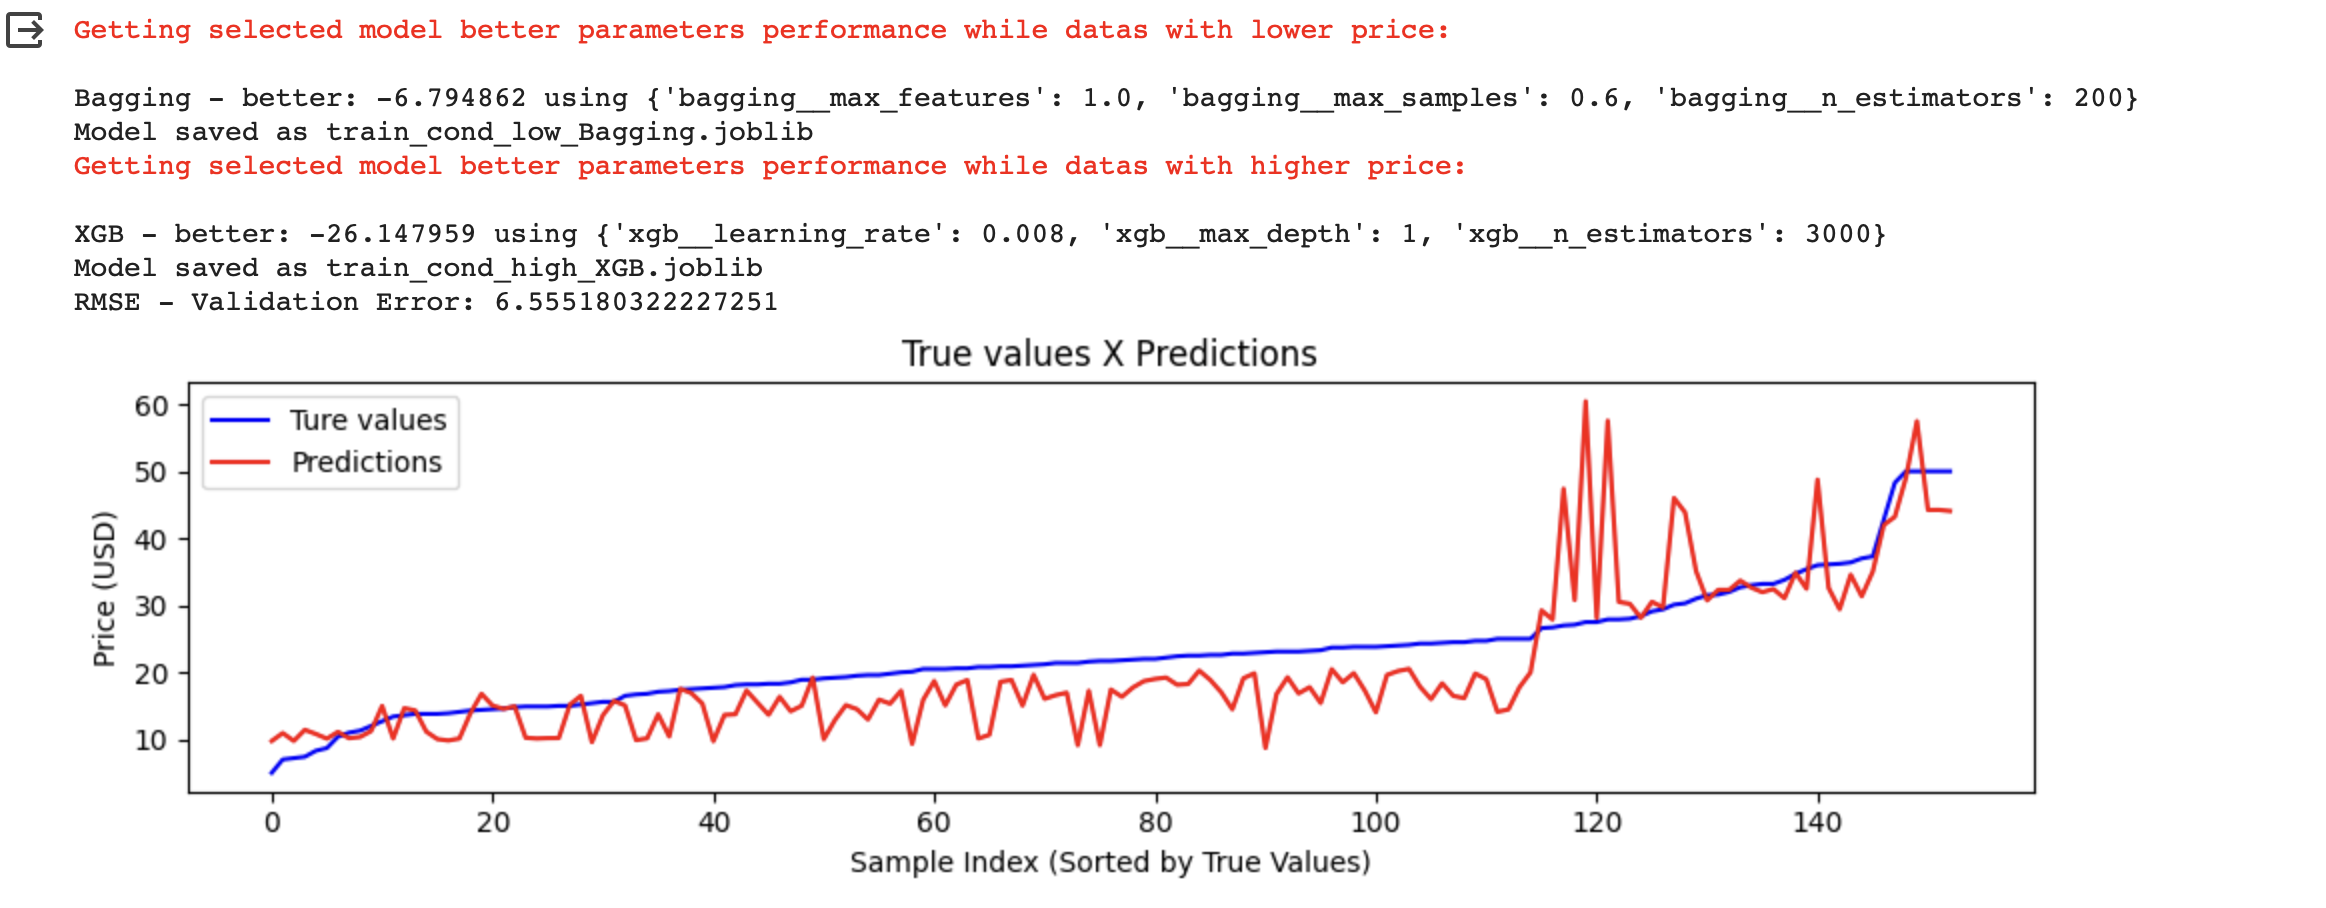

2. **Increasing Specific Sample Weights:**

* Considering the challenge in predicting high-value properties, I assigned higher weights to samples with prices exceeding 25.00. This approach intended to make the models focus more on these high-value samples during training.
* By adjusting these weights, the models had more opportunities to learn specific features and trends of high-value properties, thereby potentially increasing the accuracy of predictions in this area.

I trained the Random Forest, GBR, and XGB models with these adjustments. However, there were no significant improvements in the performance of the 12 features and 5 features datasets.

For detailed information about this training, please refer to the file: Boston_Housing_updated-addWeight.ipynb

Results:

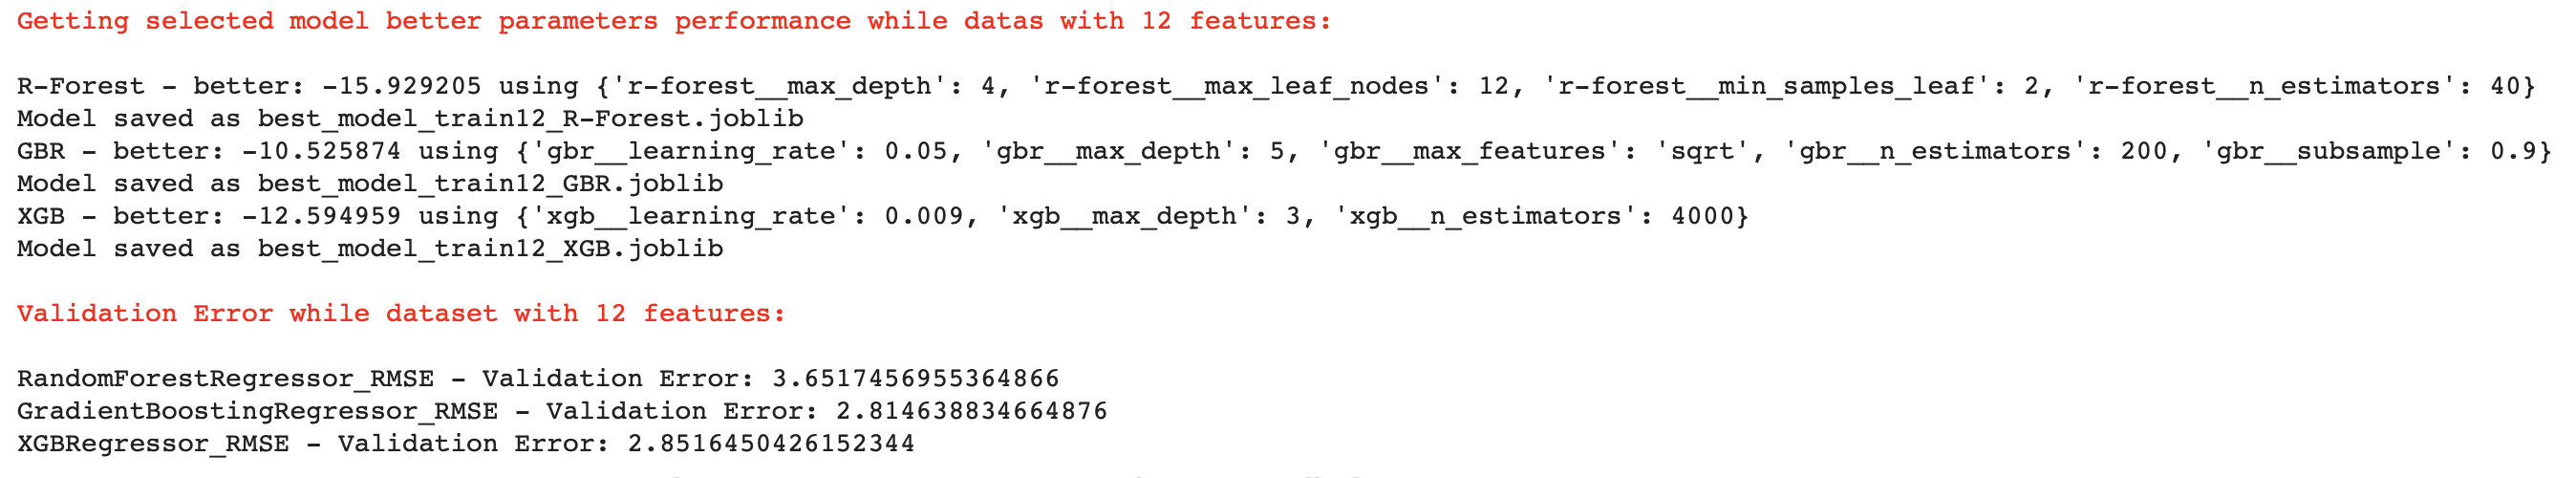

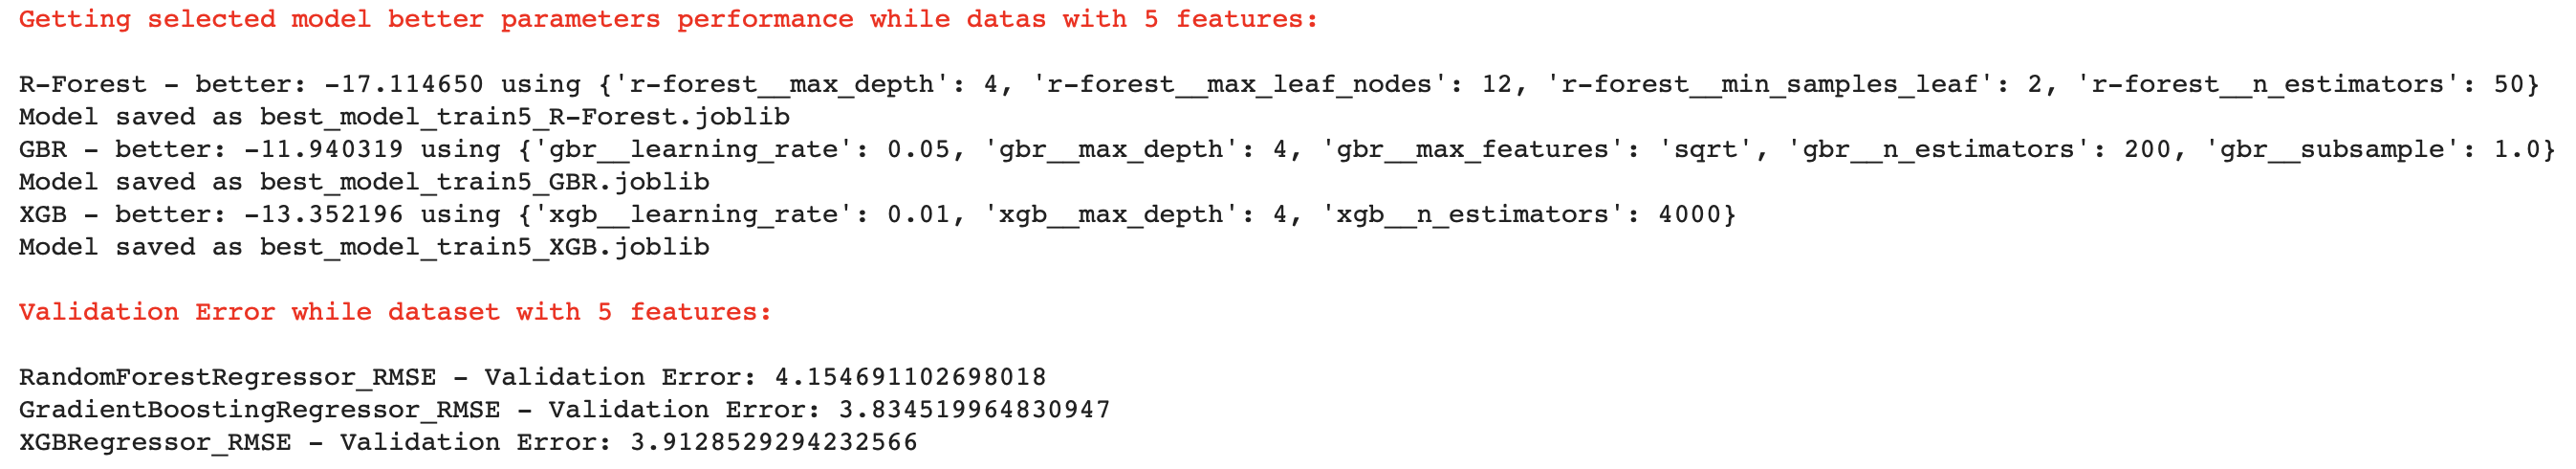

3. **Introducing Polynomial Features:**

* To enhance the predictive capabilities of the models, especially in dealing with nonlinear data relationships, we introduced polynomial features in the model training. This involved adding higher-degree terms and interaction terms of the features to expand the dataset and provide richer information for the models to learn.
* I hoped that this approach would improve the models' performance in predicting high-value properties, particularly in cases where complex interactions between features might lead to price fluctuations.

I again used the Random Forest, GBR, and XGB models. Overall, the performance of the three models with 12 features was better with polynomial features than with the original single-term feature models. For the 5 features dataset, both the GBR and XGB models with polynomial features outperformed the single-term feature models.

For detailed information about this training, please refer to the file: Boston_Housing_updated_degree.ipynb

Results:

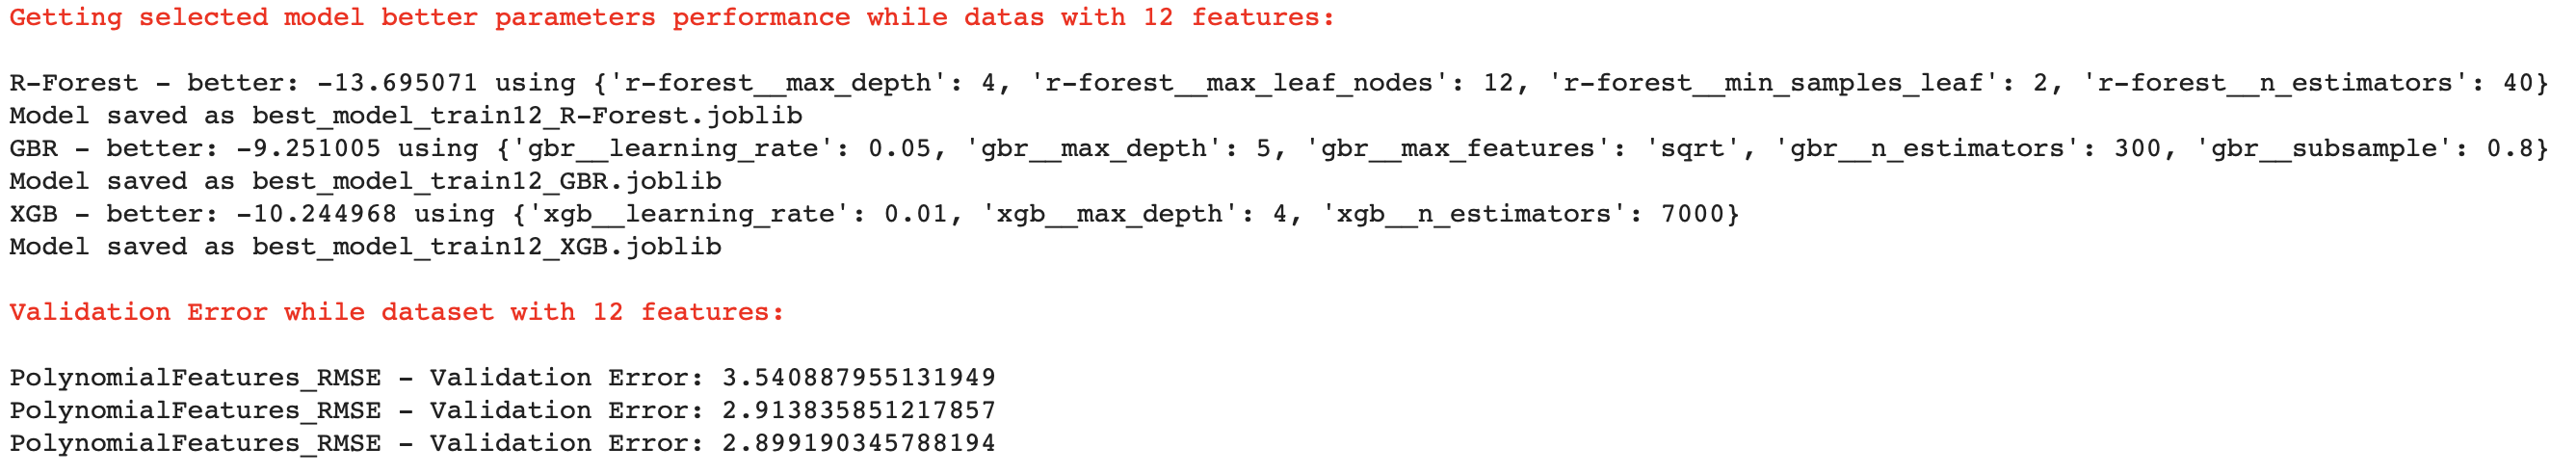

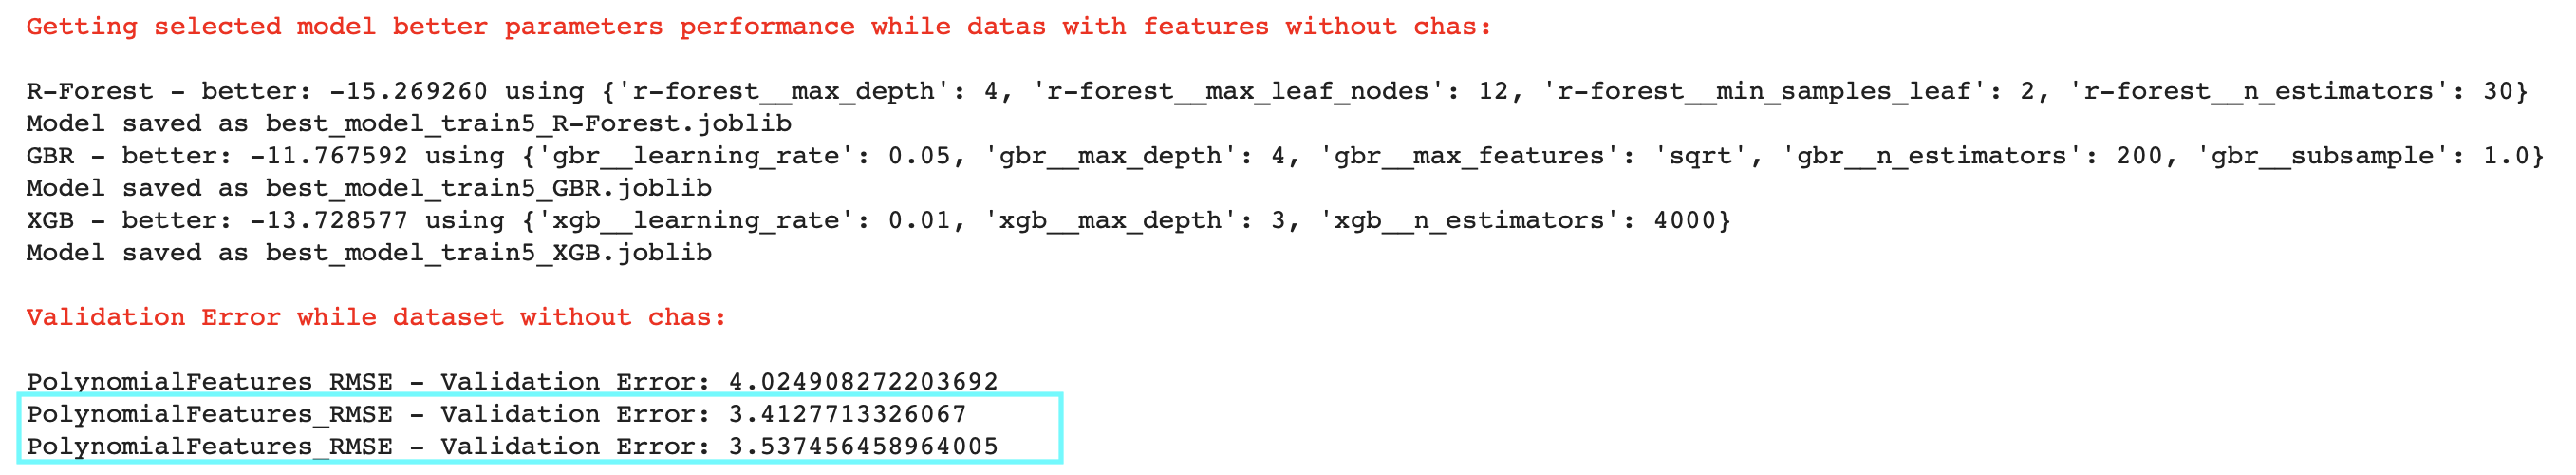

##**Loading the Model and Implementing a Feature-Based House Price Prediction Function for User Input**

In [70]:
from joblib import load

# Load a previously saved model
loaded_model = load("best_model_train5_GBR.joblib")


def predict_house_price(features):
    """
    Predict the price of a house

    :param features: A list or array containing 5 features
    :return: The predicted price of the house
    """
    features_array = np.array(features).reshape(1, -1)
    predicted_price = loaded_model.predict(features_array)
    return predicted_price[0]

def get_user_input():
    """
    Get the feature values entered by the user
    """
    features_5 = ["INDUS", "RM", "TAX", "PTRATIO", "LSTAT"]
    print("Please enter the values of house：")
    features = []
    for feature_name in features_5:
        value = float(input(f"{feature_name}: "))
        features.append(value)

    return features

# Get the features entered by the user
user_features = get_user_input()

# Predict the price of the house
predicted_price = predict_house_price(user_features)
print(f"Price of house predicted: {predicted_price:.2f}")

Please enter the values of house：
INDUS: 2.3
RM: 6
TAX: 295
PTRATIO: 15
LSTAT: 5
Price of house predicted: 15.06


In [67]:
loaded_model = load("best_model_train5_R-Forest.joblib")
print(loaded_model)

Pipeline(steps=[('normalization', MinMaxScaler()),
                ('r-forest',
                 RandomForestRegressor(max_depth=4, max_leaf_nodes=12,
                                       min_samples_leaf=2, n_estimators=40))])


##**Conclusion**

Based on the in-depth analysis and various model optimization experiments of the Boston Housing Price Prediction project, the following professional conclusions can be drawn as the Minimum Viable Product (MVP) of this project:

**Model Performance Analysis:**
In the dataset containing 12 features, the GradientBoostingRegressor and XGBRegressor demonstrated excellent performance, especially in predicting housing prices (medv-price), with Root Mean Squared Errors (RMSE) of 2.93 and 2.84, respectively. This indicates their effectiveness in predicting most data points. However, for housing prices exceeding 25.00, the models showed significant fluctuations in predictions, indicating a need for improved accuracy in predicting high-value properties.

**Data Processing and Model Optimization Strategies:**

* Data Segmentation: The method of dividing the data into lower and higher price ranges, with independent model training and optimization for each range, helped capture the features of properties in different price ranges. However, the combined model predictions did not meet expectations.

* Increasing Specific Sample Weights: The strategy of increasing the weights for high-value property samples aimed to enhance their impact on the model training, thereby improving the accuracy of predictions in these areas. The experimental results showed limited effectiveness in improving prediction fluctuations.

* **Introducing Polynomial Features:** By considering higher-order features and interactions between features to capture nonlinear relationships, especially for high-value property predictions. The experiments showed that polynomial features improved the performance of the GBR and XGB models in the 5-feature dataset, resulting in superior performance in terms of L2 Loss (MSE) compared to any other models.

Overall, these strategies contributed to improving the accuracy of Boston housing price predictions, particularly in dealing with data with complex feature relationships. However, challenges remain in predicting high-value properties, and future work can focus on further optimizing models and exploring more effective data processing methods to enhance the predictive ability in these specific areas.